[engine-size, horsepower]
[normalized-losses, highway-mpg]

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
os.getcwd()

'c:\\Users\\potto\\Desktop\\Kathmandu\\week6\\day0'

In [7]:
df=pd.read_csv('c:\\Users\\potto\\Desktop\\Kathmandu\\week5\\automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [11]:
X=df.drop('price', axis=1)
Y=df['price']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, random_state=1, test_size=0.2)


In [14]:
X_train_mult=X_train[['engine-size', 'horsepower']].values
X_test_mult=X_test[['engine-size', 'horsepower']].values

In [15]:
mult_lm=LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [17]:
result=mult_lm.predict(X_test_mult)
result[:5]

array([12077.52113264,  6628.90601721, 11483.76279299,  7380.92800977,
       16406.60092931])

In [18]:
y_test[:5]

97      9549.0
117     6229.0
59     10245.0
35      7295.0
165     9989.0
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

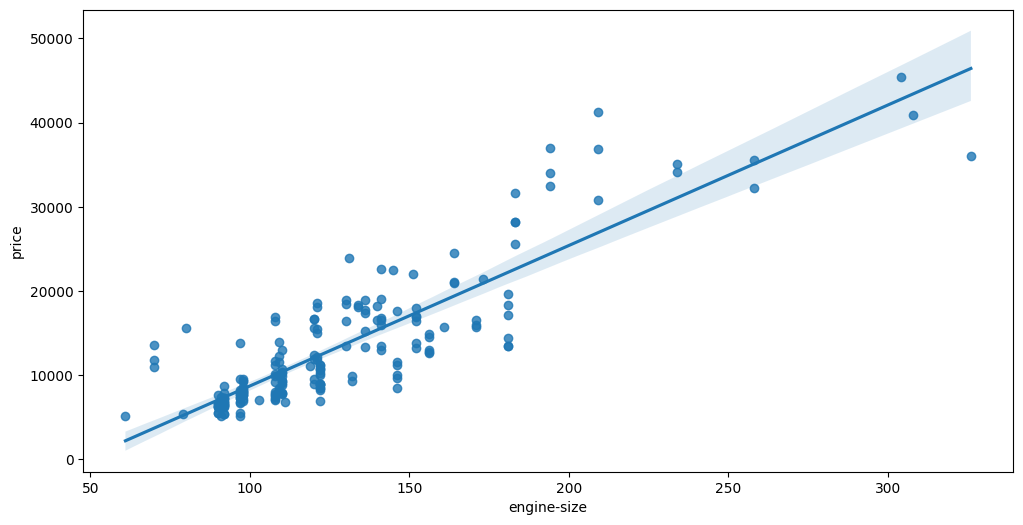

In [19]:
plt.figure(figsize=(12,6))
sns.regplot(x='engine-size',y='price',data=df)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

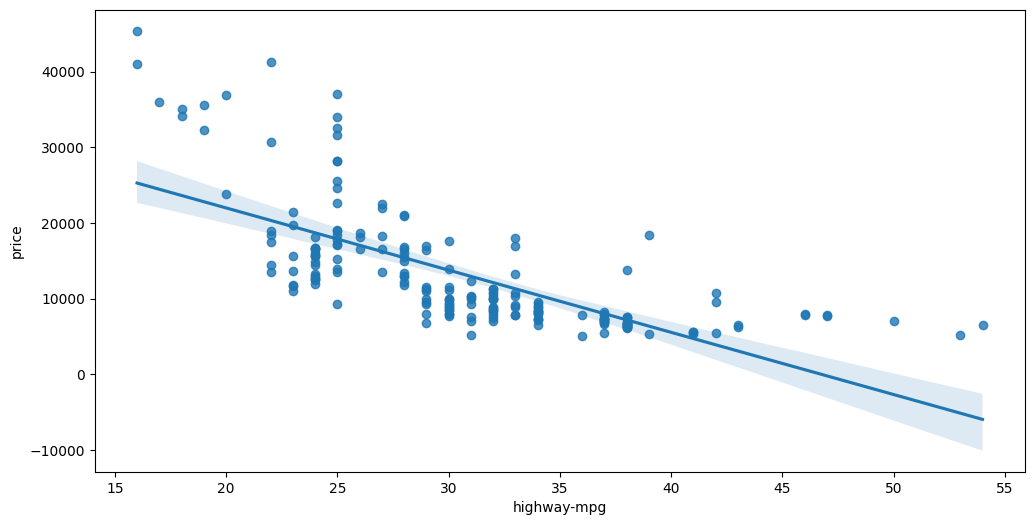

In [20]:
plt.figure(figsize=(12,6))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.show

### Distribution Plot
- We successfully visualize simple linear regression model using Regression plot. It will be complicated for multiple linear regression since there will be multiple independent variables, in such scenarios we could using Distribution plot.
- Now let's visualize our prediction from linear regression model using Distribution plot.

C:\Users\potto\AppData\Local\Temp\ipykernel_15876\3271985887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,hist=False, color='r', label='Actual value')
C:\Users\potto\AppData\Local\Temp\ipykernel_15876\3271985887.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

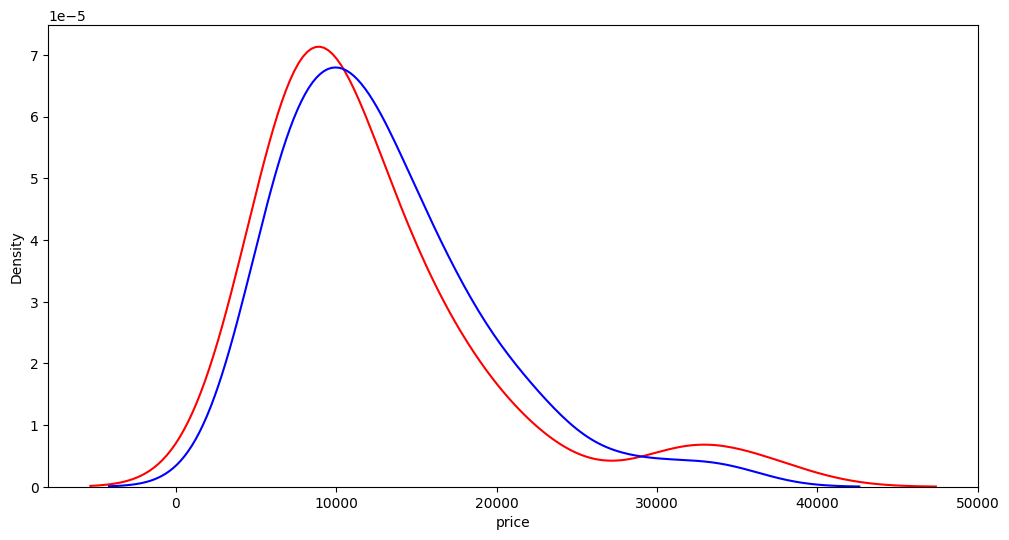

In [24]:
plt.figure(figsize=(12,6))
ax1=sns.distplot(y_test,hist=False, color='r', label='Actual value')
sns.distplot(result,hist=False, color='b', label= "Fitted value", ax=ax1)
plt.show()